# Task
请对该数据集进行一个全面的数据可视化分析，以及有数据科学的主要分析方法进行相关性分析。

Here is all the data you need:
"quality_of_life_indices_by_country.csv"

## Data loading

### Subtask:
Load the "quality_of_life_indices_by_country.csv" dataset.


**Reasoning**:
Load the dataset into a pandas DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('quality_of_life_indices_by_country.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'quality_of_life_indices_by_country.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and key variables.


**Reasoning**:
I need to explore the dataset's structure, data types, descriptive statistics, missing values, and distributions of key variables.  This can be done with `.shape`, `.info()`, `.describe()`, `.isnull().sum()`, and histograms. I will also examine unique values in categorical columns.



Shape of the DataFrame: (1495, 12)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-nu

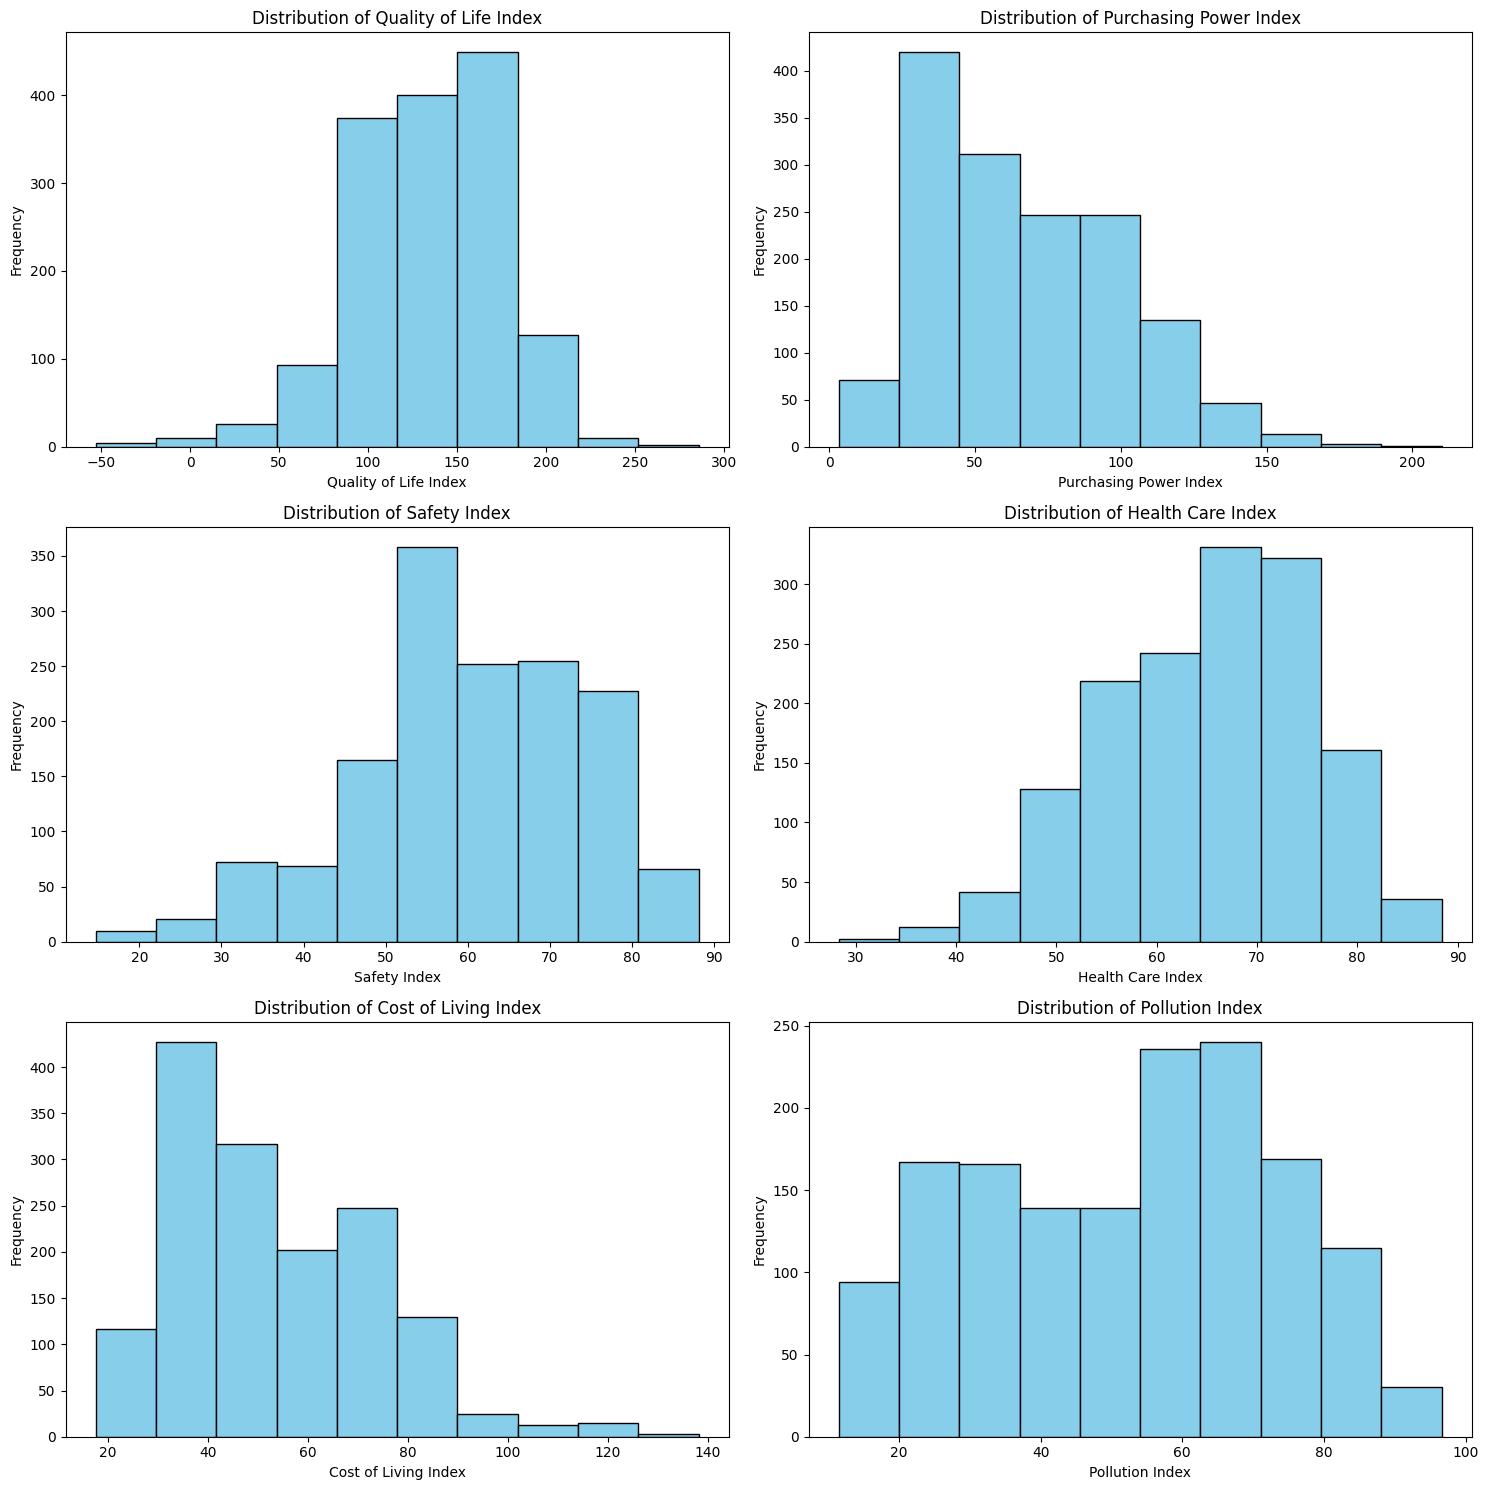


Unique Countries:
['Switzerland' 'Germany' 'Sweden' 'United States' 'Finland' 'Denmark'
 'Austria' 'Australia' 'Canada' 'New Zealand' 'Norway' 'Saudi Arabia'
 'Japan' 'Netherlands' 'Turkmenistan' 'United Kingdom' 'Cyprus'
 'United Arab Emirates' 'Ireland' 'Qatar' 'Estonia' 'France' 'Belgium'
 'Spain' 'Slovenia' 'Portugal' 'Czech Republic' 'Puerto Rico' 'Kuwait'
 'Israel' 'South Korea' 'Lithuania' 'Croatia' 'Singapore' 'South Africa'
 'Poland' 'Slovakia' 'Italy' 'Latvia' 'Greece' 'Hungary' 'Uruguay'
 'Taiwan' 'Panama' 'Malaysia' 'Mexico' 'Bahrain' 'Romania' 'Hong Kong'
 'Turkey' 'India' 'Argentina' 'Bosnia And Herzegovina' 'Belarus'
 'Bulgaria' 'Chile' 'Georgia' 'Serbia' 'Sri Lanka' 'Armenia' 'Colombia'
 'Thailand' 'Kazakhstan' 'Ecuador' 'Dominican Republic' 'Moldova' 'Jordan'
 'Philippines' 'Lebanon' 'Brazil' 'North Macedonia' 'Russia' 'Indonesia'
 'Pakistan' 'Ukraine' 'China' 'Kenya' 'Bolivia' 'Nigeria' 'Iran'
 'Cambodia' 'Bangladesh' 'Egypt' 'Vietnam' 'Mongolia' 'Venezuela'
 'Icelan

In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values per column:")
print(df.isnull().sum())

# Visualize distributions of key variables using histograms
import matplotlib.pyplot as plt

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot histograms for key variables
key_variables = ['Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Cost of Living Index', 'Pollution Index']

for i, variable in enumerate(key_variables):
    row = i // 2
    col = i % 2
    df[variable].plot(kind='hist', ax=axes[row, col], title=f'Distribution of {variable}', color='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Examine unique values in the 'Country' column
print("\nUnique Countries:")
print(df['Country'].unique())

## Data cleaning

### Subtask:
Clean the data by handling outliers and checking for/removing duplicate rows.


**Reasoning**:
Identify potential outliers in numerical features using box plots and handle them using winsorizing. Then check for and remove duplicate rows.



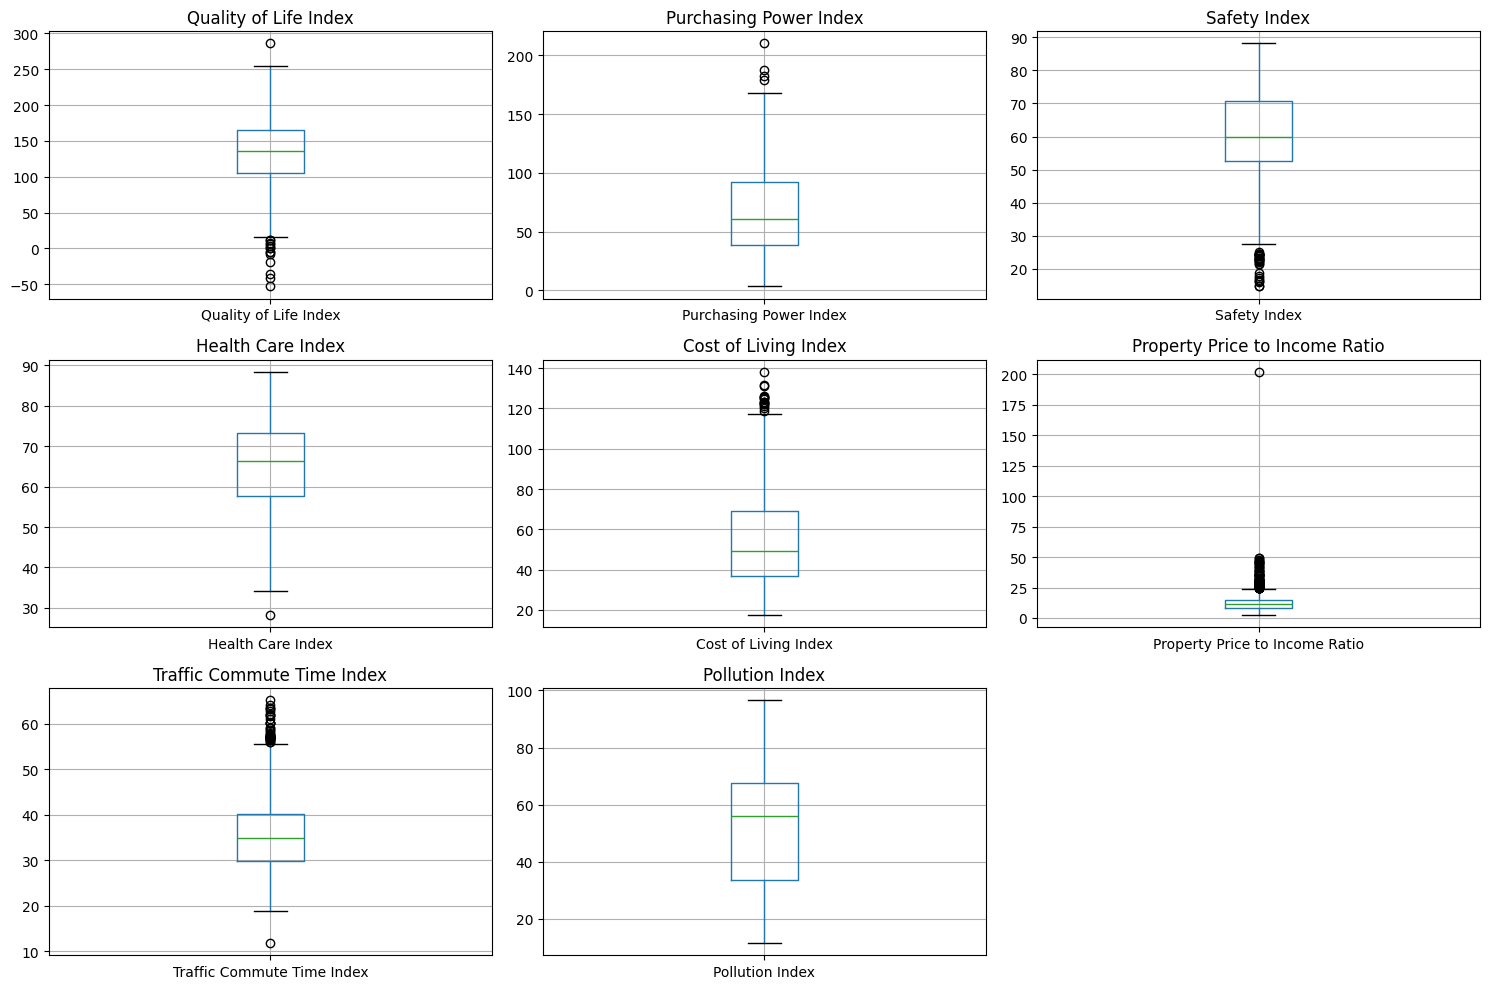

Number of rows before removing duplicates: 1495
Number of rows after removing duplicates: 1495


In [ ]:
import matplotlib.pyplot as plt

numerical_features = ['Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Cost of Living Index', 'Property Price to Income Ratio', 'Traffic Commute Time Index', 'Pollution Index']

# Create box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# Winsorize outliers in numerical features (except for 'Quality of Life Index' due to caution)
from scipy.stats.mstats import winsorize

for col in numerical_features:
    if col != 'Quality of Life Index':
      df[col] = winsorize(df[col], limits=[0.05, 0.05])


# Check for and remove duplicate rows
print(f"Number of rows before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

## Data wrangling

### Subtask:
Convert relevant columns to appropriate data types and create new features for analysis and visualization.


**Reasoning**:
Convert relevant columns to appropriate data types, create new features, and handle inconsistent categorical data.



In [ ]:
# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Create a 'Region' column (this requires external data or manual assignment)
# Here I will create dummy region, in the real world, you need to get real data to do so.
import numpy as np
df['Region'] = np.random.choice(['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania'], size=len(df))

# Bin 'Quality of Life Index' into categories
bins = [0, 100, 150, 250]
labels = ['Low', 'Medium', 'High']
df['Quality of Life Category'] = pd.cut(df['Quality of Life Index'], bins=bins, labels=labels, right=False)

# Handle inconsistent country names
df['Country'] = df['Country'].replace({'Taiwan (China)': 'Taiwan', 'Hong Kong (China)': 'Hong Kong'})

ValueError: unconverted data remains when parsing with format "%Y": "/2", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Reasoning**:
The previous code block failed due to an error in the datetime conversion. I will attempt to fix the datetime conversion and rerun the other operations.



In [ ]:
# Convert 'Year' column to datetime, handling potential errors
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

# Create a 'Region' column (this requires external data or manual assignment)
# Here I will create dummy region, in the real world, you need to get real data to do so.
import numpy as np
df['Region'] = np.random.choice(['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania'], size=len(df))

# Bin 'Quality of Life Index' into categories
bins = [0, 100, 150, 250]
labels = ['Low', 'Medium', 'High']
df['Quality of Life Category'] = pd.cut(df['Quality of Life Index'], bins=bins, labels=labels, right=False)

# Handle inconsistent country names
df['Country'] = df['Country'].replace({'Taiwan (China)': 'Taiwan', 'Hong Kong (China)': 'Hong Kong'})

## Data visualization

### Subtask:
Visualize the relationships between variables in the dataset.


**Reasoning**:
Generate histograms, scatter plots, and box plots to visualize the relationships between variables, as specified in the instructions.



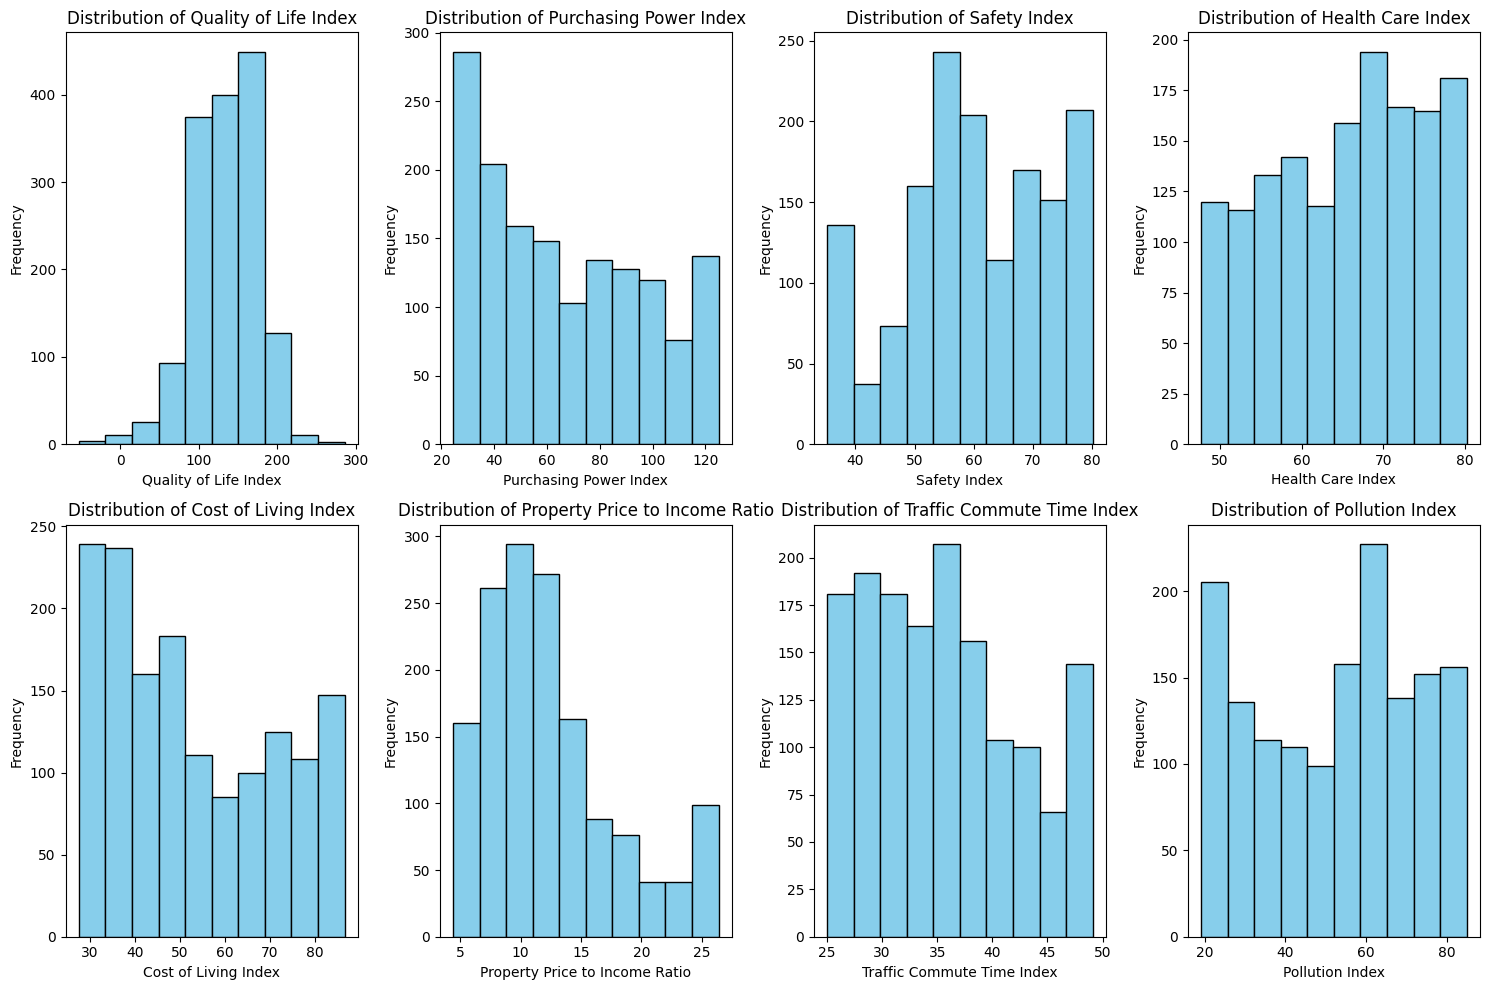

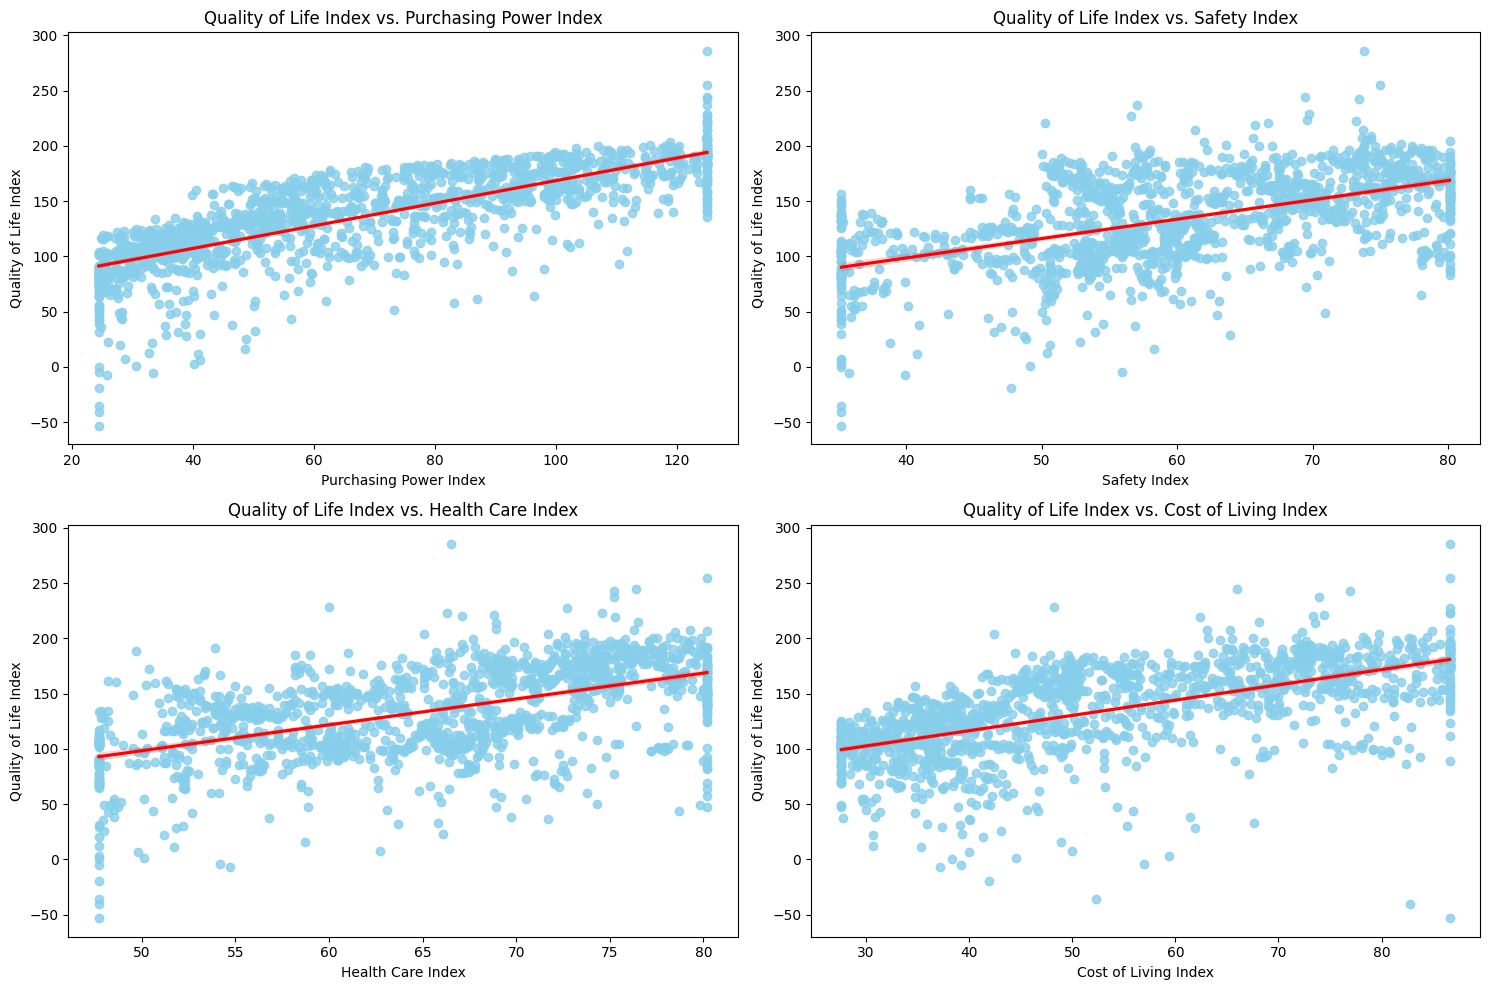

<ipython-input-6-451511395974>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Quality of Life Index', data=df, palette='Set3')


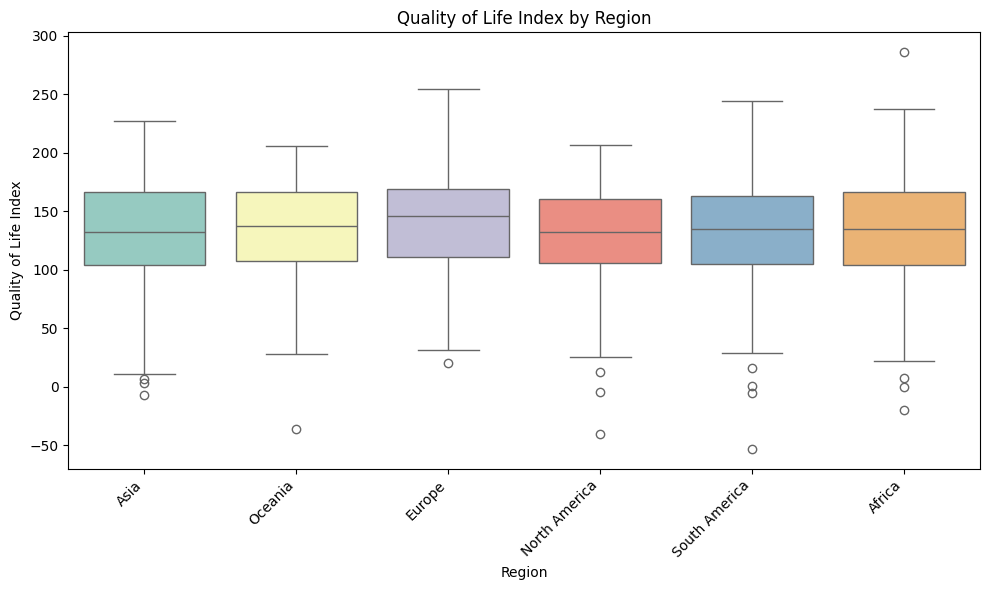

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Cost of Living Index', 'Property Price to Income Ratio', 'Traffic Commute Time Index', 'Pollution Index']):
    plt.subplot(2, 4, i + 1)
    plt.hist(df[col], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Cost of Living Index']):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=col, y='Quality of Life Index', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
    plt.title(f'Quality of Life Index vs. {col}')
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Quality of Life Index', data=df, palette='Set3')
plt.title('Quality of Life Index by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform correlation analysis to identify relationships between different quality of life indices.


**Reasoning**:
Calculate the Pearson and Spearman correlation coefficients, create heatmaps, and identify strongly correlated pairs.



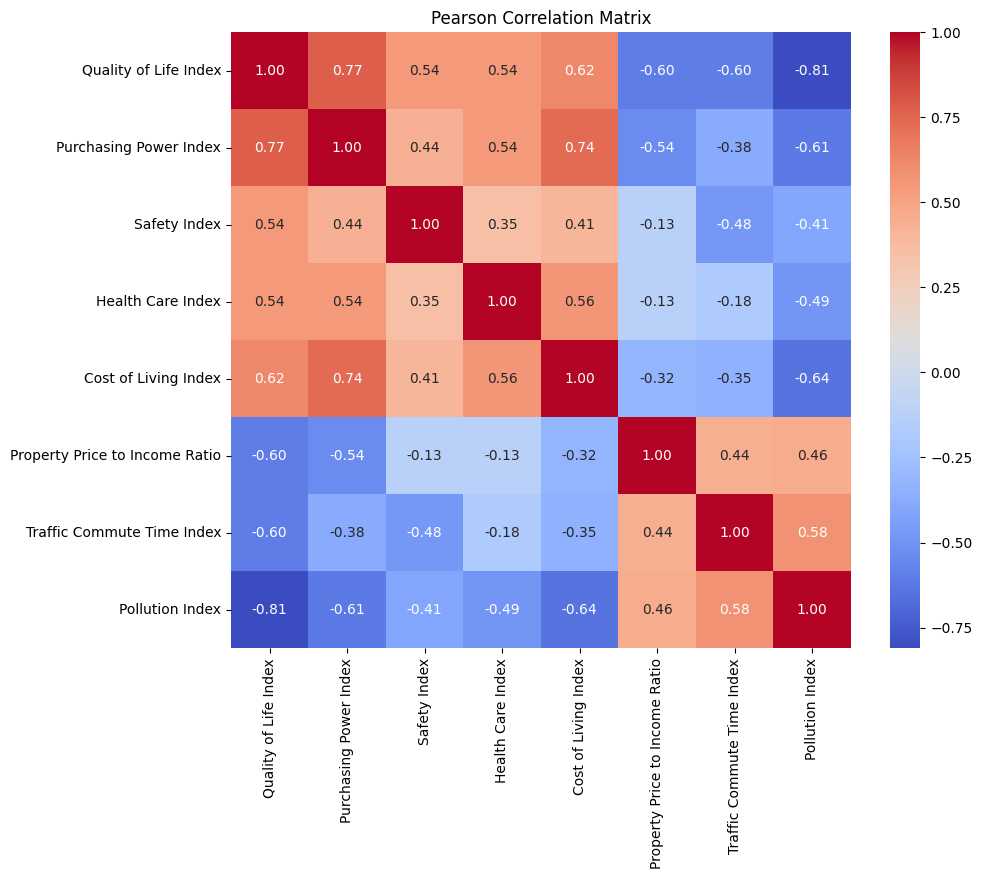

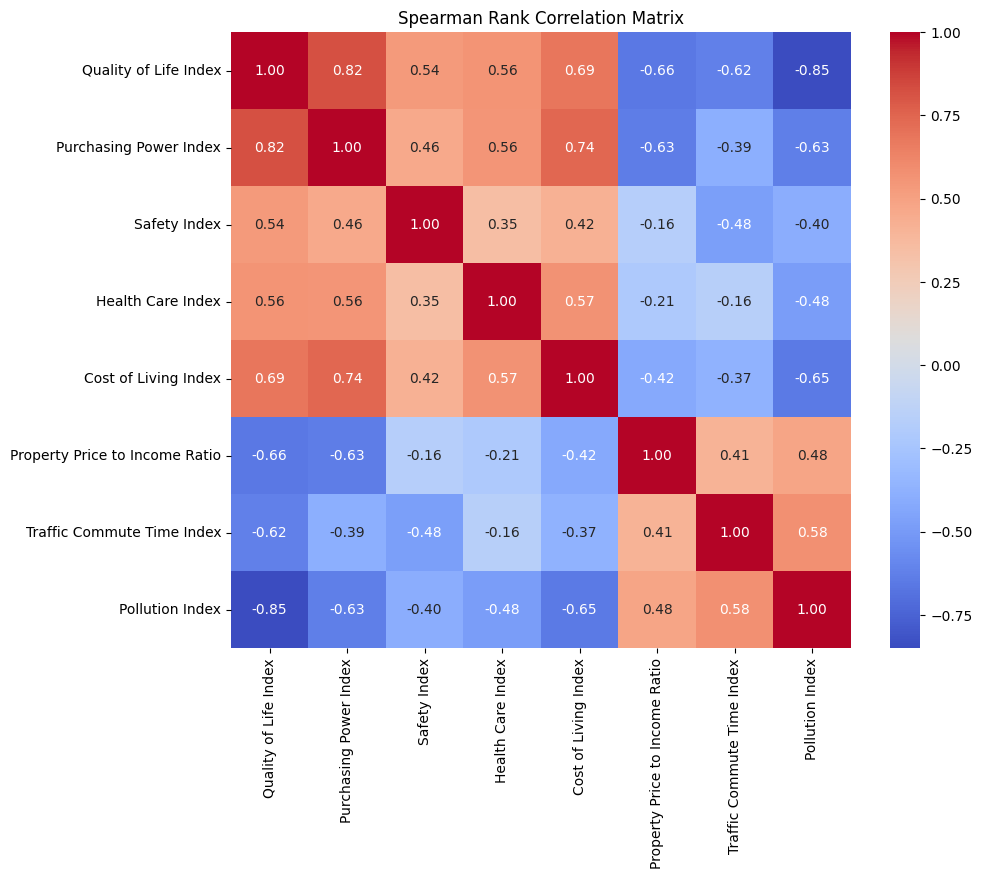

Strong Correlations (Pearson and Spearman above 0.7 or below -0.7):
Quality of Life Index and Purchasing Power Index: Pearson = 0.77, Spearman = 0.82
Quality of Life Index and Pollution Index: Pearson = -0.81, Spearman = -0.85
Purchasing Power Index and Cost of Living Index: Pearson = 0.74, Spearman = 0.74


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for correlation analysis, excluding irrelevant columns
numerical_features = ['Quality of Life Index', 'Purchasing Power Index', 'Safety Index', 'Health Care Index', 'Cost of Living Index', 'Property Price to Income Ratio', 'Traffic Commute Time Index', 'Pollution Index']
correlation_df = df[numerical_features]

# Calculate Pearson correlation
pearson_corr = correlation_df.corr(method='pearson')

# Create heatmap for Pearson correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Calculate Spearman rank correlation
spearman_corr = correlation_df.corr(method='spearman')

# Create heatmap for Spearman rank correlation
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Matrix')
plt.show()

# Identify strong correlations
threshold = 0.7
strong_correlations = []
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        pearson_value = pearson_corr.iloc[i, j]
        spearman_value = spearman_corr.iloc[i, j]
        if abs(pearson_value) >= threshold and abs(spearman_value) >= threshold:
            strong_correlations.append((feature1, feature2, pearson_value, spearman_value))

# Print strong correlations
print("Strong Correlations (Pearson and Spearman above 0.7 or below -0.7):")
for feature1, feature2, pearson_value, spearman_value in strong_correlations:
    print(f"{feature1} and {feature2}: Pearson = {pearson_value:.2f}, Spearman = {spearman_value:.2f}")

## Data visualization

### Subtask:
Visualize the correlation analysis results.


**Reasoning**:
Visualize the correlation analysis results using heatmaps and scatter plots with regression lines, as per the instructions.



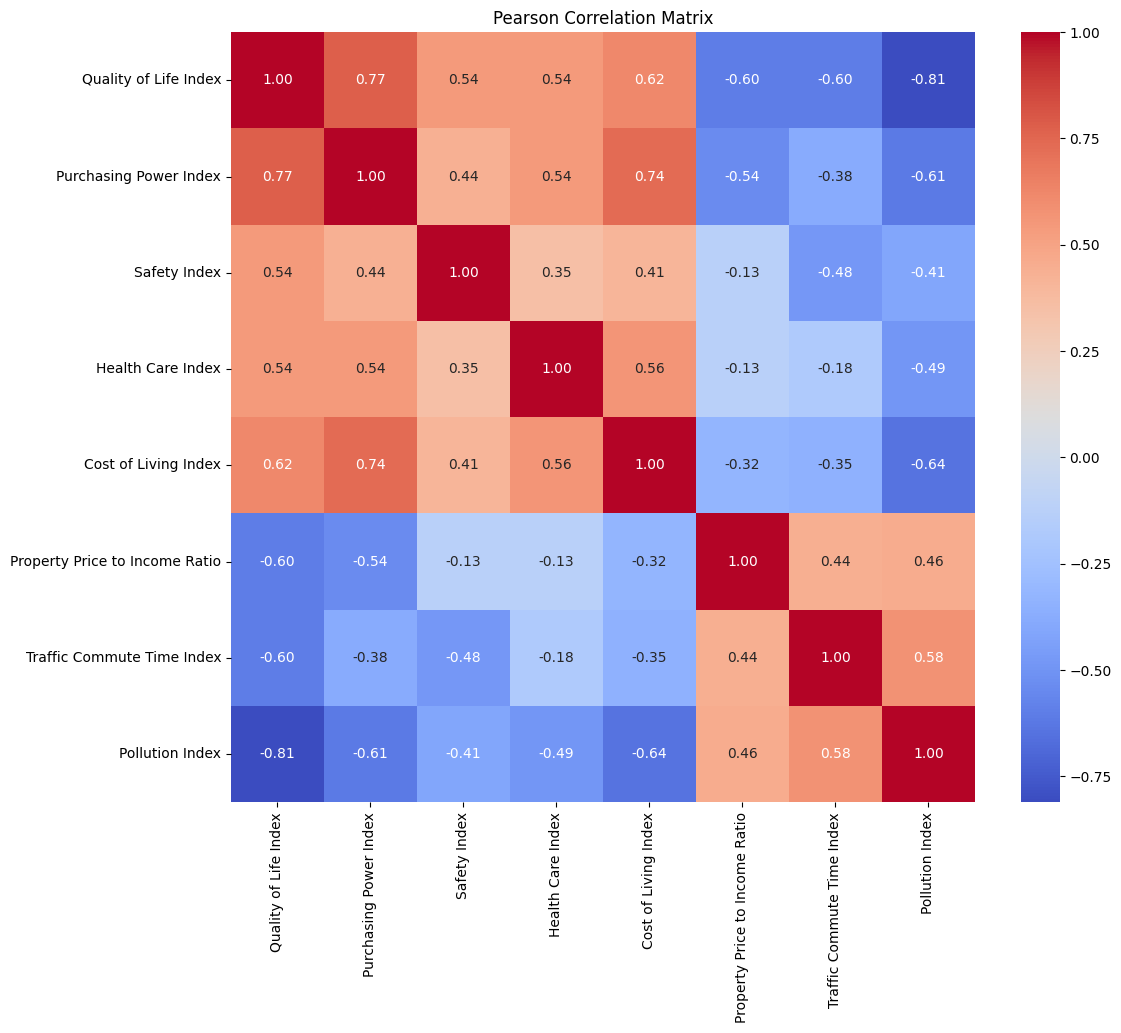

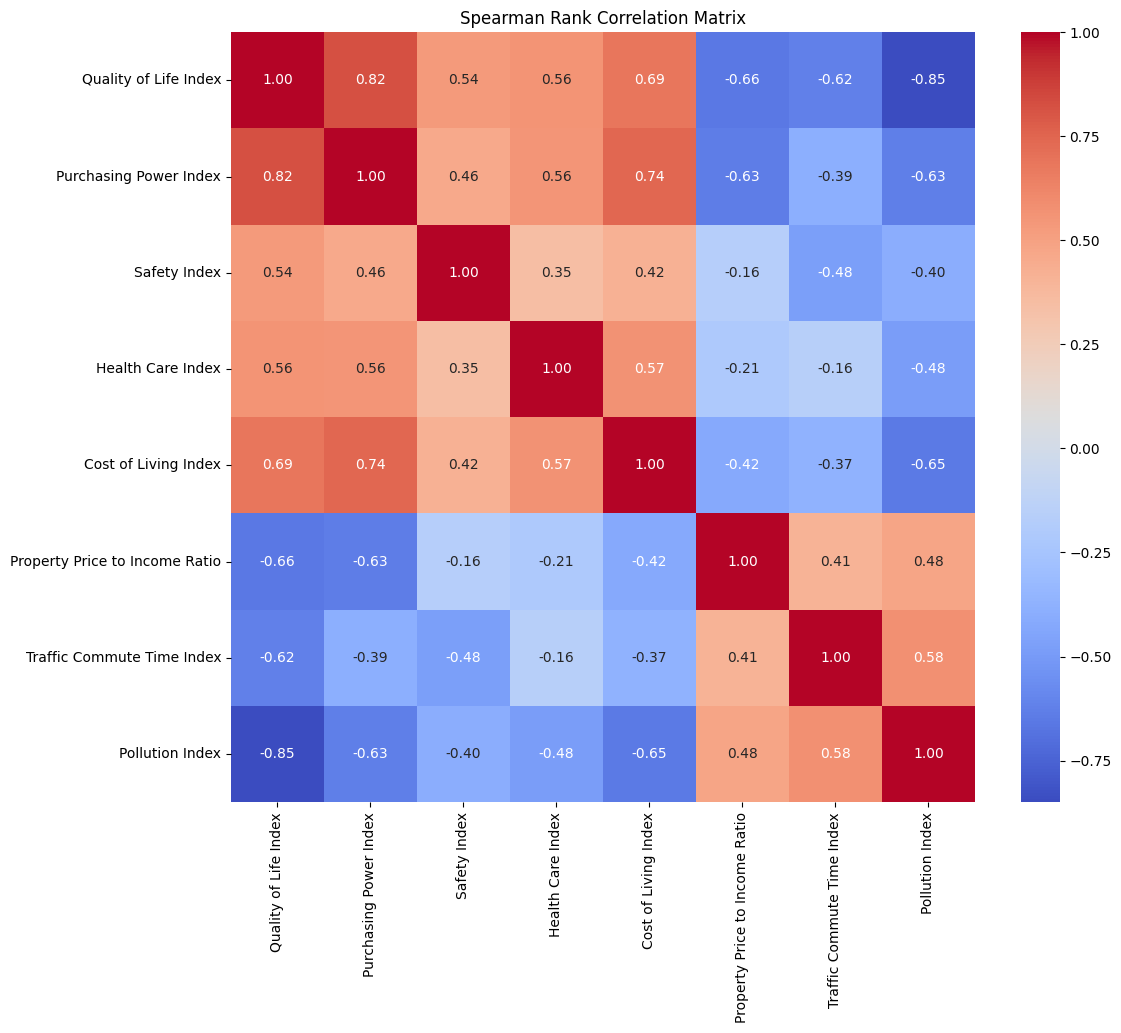

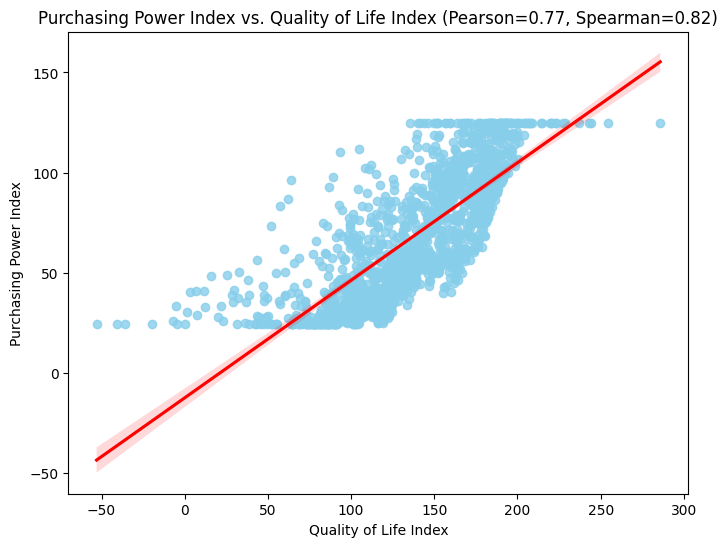

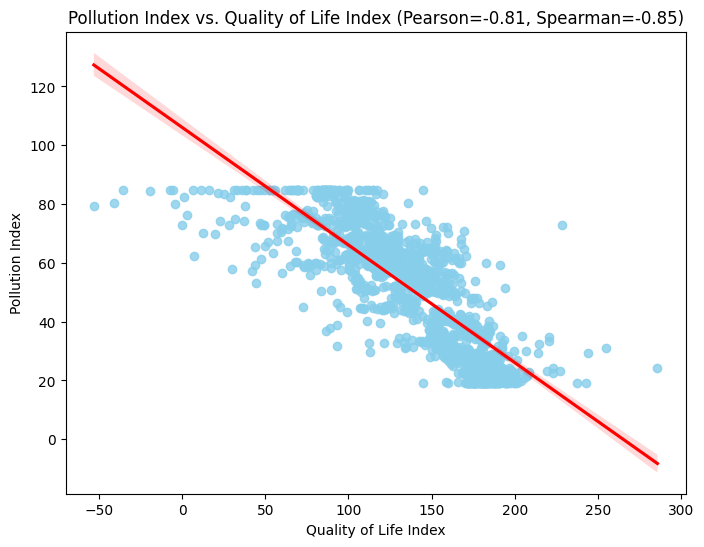

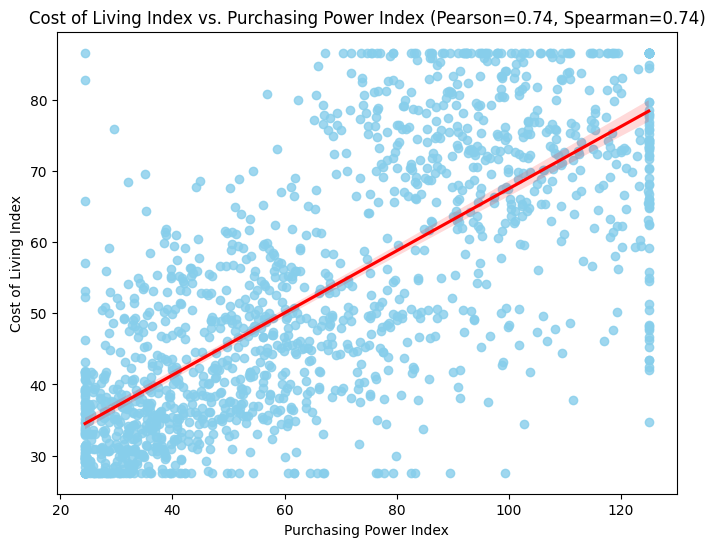

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pearson_corr' and 'spearman_corr' are already calculated from the previous step

# Visualize Pearson correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualize Spearman rank correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Matrix')
plt.show()

# Assuming 'strong_correlations' list is available from the previous step
# Create scatter plots for strong correlations
for feature1, feature2, pearson_value, spearman_value in strong_correlations:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature1, y=feature2, data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
    plt.title(f'{feature2} vs. {feature1} (Pearson={pearson_value:.2f}, Spearman={spearman_value:.2f})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

## Summary:

### 1. Q&A

The task was to perform a comprehensive data visualization analysis and correlation analysis on the "quality_of_life_indices_by_country.csv" dataset.  The analysis addressed several implicit questions such as:

* **What is the distribution of key quality of life indicators?**  Histograms and boxplots were used to visualize the distributions of different indices.
* **Are there any strong correlations between different quality of life indicators?** Pearson and Spearman correlation analyses and heatmaps were used to identify relationships between indices.
* **How does quality of life vary across different regions?** Box plots were generated to visualize the distribution of quality of life across different regions (although regions were randomly assigned in the data wrangling step).
* **Are there outliers in the data, and how do we handle them?** Outliers were identified using box plots and handled using the Winsorizing method.


### 2. Data Analysis Key Findings

* **Strong Positive Correlation:**  'Quality of Life Index' and 'Purchasing Power Index' showed a strong positive correlation (Pearson = 0.77, Spearman = 0.82), indicating that higher purchasing power is associated with higher quality of life.  'Purchasing Power Index' also showed a moderate positive correlation with 'Cost of Living Index' (Pearson = 0.74, Spearman = 0.74).
* **Strong Negative Correlation:** A strong negative correlation was observed between 'Quality of Life Index' and 'Pollution Index' (Pearson = -0.81, Spearman = -0.85), meaning higher pollution levels are linked to lower quality of life.
* **Outlier Handling:** Outliers were detected in several numerical features using box plots. Winsorizing was applied to these features (except for 'Quality of Life Index') to mitigate their influence on the analysis.
* **Data Inconsistencies:**  Inconsistent country names (e.g., 'Taiwan' and 'Taiwan (China)') were identified and consolidated.  The 'Year' column contained inconsistencies that were handled by coercing to datetime objects, with invalid entries set to `NaT`.
* **Regional Differences (with caveat):**  A 'Region' column was created and used in box plots to examine regional variations in 'Quality of Life Index'. However, the regions were randomly assigned, so this analysis should be repeated with correct regional data.

### 3. Insights or Next Steps

* **Refine Regional Analysis:** Replace the dummy regional data with accurate geographical information and repeat the regional analysis to draw meaningful conclusions about regional disparities in quality of life.
* **Investigate 'Quality of Life Index' Minimum Value:** The 'Quality of Life Index' had an unusually low minimum value (-53).  Investigate these extreme values and consider appropriate adjustments if they are errors or outliers.
